In [1]:
using LinearAlgebra
using Flux, DiffEqFlux, Optim, DiffEqSensitivity
using DifferentialEquations
using Plots

# $U_{xx} = b $ 

# $ \frac{U_{i+1} - 2U_i + U_{i-1}}{\Delta x^2} = b_i $ 

## $ AU = B $

In [9]:
Δx = 0.1
x = Δx:Δx:1-Δx # Solve only for the interior: the endpoints are known to be zero!
N = length(x)
B = sin.(2π*x)
A = zeros(N,N)
for i in 1:N, j in 1:N
  abs(i-j)<=1 && (A[i,j]+=1)
  i==j && (A[i,j]-=3)
end
A = A/(Δx^2)

9×9 Array{Float64,2}:
 -200.0   100.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0
  100.0  -200.0   100.0     0.0     0.0     0.0     0.0     0.0     0.0
    0.0   100.0  -200.0   100.0     0.0     0.0     0.0     0.0     0.0
    0.0     0.0   100.0  -200.0   100.0     0.0     0.0     0.0     0.0
    0.0     0.0     0.0   100.0  -200.0   100.0     0.0     0.0     0.0
    0.0     0.0     0.0     0.0   100.0  -200.0   100.0     0.0     0.0
    0.0     0.0     0.0     0.0     0.0   100.0  -200.0   100.0     0.0
    0.0     0.0     0.0     0.0     0.0     0.0   100.0  -200.0   100.0
    0.0     0.0     0.0     0.0     0.0     0.0     0.0   100.0  -200.0

In [16]:
# Solve AU = B
print(B)
U = A\B

[0.5877852522924731, 0.9510565162951535, 0.9510565162951536, 0.5877852522924732, 1.2246467991473532e-16, -0.587785252292473, -0.9510565162951535, -0.9510565162951536, -0.5877852522924734]

9-element Array{Float64,1}:
 -0.015388417685876272
 -0.02489898284882781
 -0.024898982848827814
 -0.015388417685876276
 -3.700743415417189e-18
  0.015388417685876269
  0.02489898284882781
  0.02489898284882781
  0.01538841768587627

In [19]:
A*U + B

9-element Array{Float64,1}:
  1.1755705045849465
  1.9021130325903073
  1.9021130325903082
  1.1755705045849467
 -9.957992501029599e-17
 -1.1755705045849458
 -1.9021130325903073
 -1.9021130325903075
 -1.1755705045849463

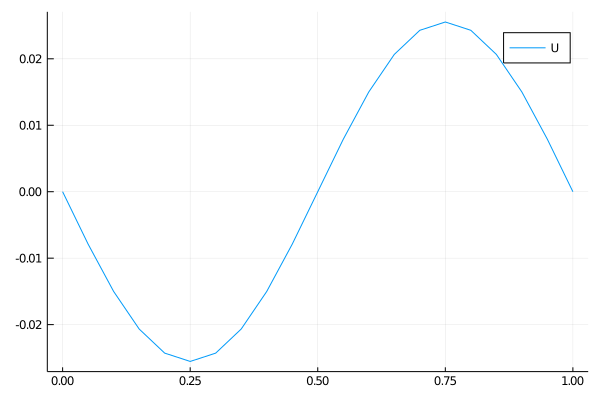

In [7]:
plot([0;x;1],[0;U;0],label="U")

# First order ordinary differential equation

$ U_t = cos(2\pi*t) $

In [103]:
function f(u,p,t)
    A, b = p
    cos(2*pi*t)
end

u0 = 0.0
tspan = (0.0,1.0)
p = [A, B]
prob = ODEProblem(f,u0,tspan, p, saveat=0.01)
sol = solve(prob)

retcode: Success
Interpolation: 1st order linear
t: 101-element Array{Float64,1}:
 0.0
 0.01
 0.02
 0.03
 0.04
 0.05
 0.06
 0.07
 0.08
 0.09
 0.1
 0.11
 0.12
 ⋮
 0.89
 0.9
 0.91
 0.92
 0.93
 0.94
 0.95
 0.96
 0.97
 0.98
 0.99
 1.0
u: 101-element Array{Float64,1}:
  0.0
  0.009993421557959131
  0.0199474104796705
  0.02982266226029898
  0.03958022071476719
  0.04918159908447919
  0.0585889419552788
  0.06776496904735094
  0.07667347363811446
  0.085279408254235
  0.09354888467162477
  0.10144918757988716
  0.10894925106736848
  ⋮
 -0.10147110085573988
 -0.0935774116158272
 -0.08531150365240167
 -0.07670552093171203
 -0.06779339229969251
 -0.0586108314819608
 -0.0491953370838225
 -0.039586192590264566
 -0.02982446636596295
 -0.019949141856243236
 -0.009995163936678
 -1.7408063988183247e-6

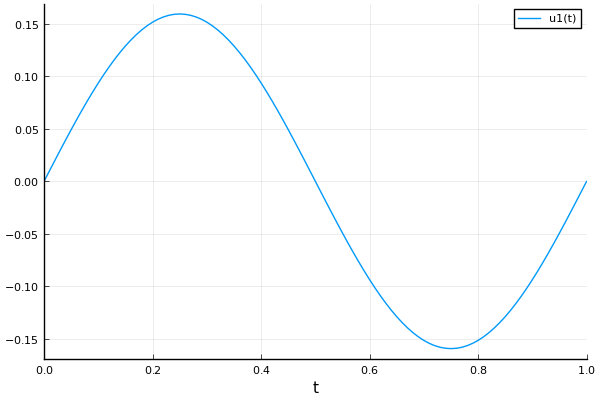

In [104]:
plot(sol)